### Imports, global variable declarations and other high-level configs

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import config
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os


Avoid running the following cell repeatedly because it might require re-scrapping the data. Running the following block once is enough.

In [3]:
stop_words = set(stopwords.words('english'))
companies = config.companies_of_interest
df = pd.DataFrame()
yahoo_results = []

# create the folder if it does not exist
if not os.path.exists('Visualizations'):
    os.makedirs('Visualizations')

### The following cell collects data from Yahoo news about our companies
Warning: don't run this block repeatedly, you'll risk getting your IP blocked.

In [4]:
for company in companies:
    yahoo_url = f"https://news.search.yahoo.com/search?p={company}"
    yahoo_response = requests.get(yahoo_url)
    yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

    yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
    yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

    for i in range(len(yahoo_titles)):
        title = yahoo_titles[i].text.strip()
        summary = yahoo_summaries[i].text.strip()
        yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News", "company": company})

    # Create dataframe
    results = yahoo_results 
    results_df = pd.DataFrame(results)
    # Append the results_df to the existing DataFrame (df)
    df = df.append(results_df, ignore_index=True)
    # df.head(5)

C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\781613398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df, ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\781613398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df, ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\781613398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df, ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\781613398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(results_df, ignore_index=True)
C:\Users

Dataframe information

In [6]:
grouped = df.groupby('company')

# Loop over the groups and create a new data frame for each group
for group_name, group_data in grouped:
    group_df = pd.DataFrame(group_data)
    print('Group:', group_name)
    group_df

Group: Adani
Group: Block
Group: Blockchain
Group: Ebix
Group: Kandi
Group: Loki
Group: Lordstown
Group: Nikola
Group: Twitter


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    540 non-null    object
 1   summary  540 non-null    object
 2   source   540 non-null    object
 3   company  540 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


,title,summary,source,company
count,540,540,540,540
unique,88,88,1,9
top,10 Best RFID Blocking Wallets To Help Keep You...,Commonly known as radio-frequency identificati...,Yahoo News,Block
freq,11,11,540,110


In [8]:
df.head()

,title,summary,source,company
0,NBA Twitter reacts to Denver Nuggets' Nikola J...,NBA Twitter had thoughts on the incident betwe...,Yahoo News,Twitter
1,Twitter Criticized for Allowing Texas Shooting...,When graphic images began circulating on Twitt...,Yahoo News,Twitter
2,You’ll Never Walk Alone performance at Coronat...,The song has a close link to Liverpool footbal...,Yahoo News,Twitter
3,Twitter Memed Katy Perry Being Super Lost At T...,Video of Katy Perry struggling to find her sea...,Yahoo News,Twitter
4,New Twitter rules expose election offices to s...,The election commission applied weeks ago for ...,Yahoo News,Twitter


### Visualizations of data scrapped from Yahoo News

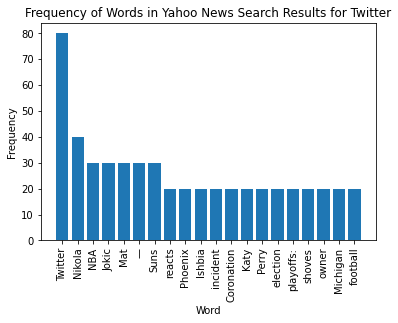

------


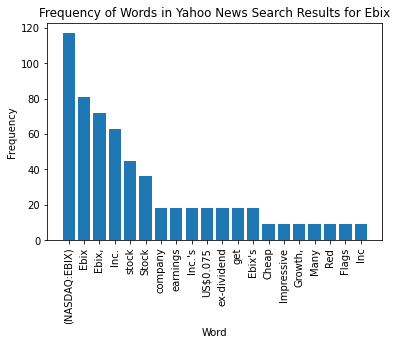

------


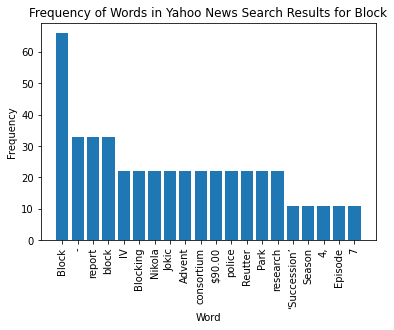

------


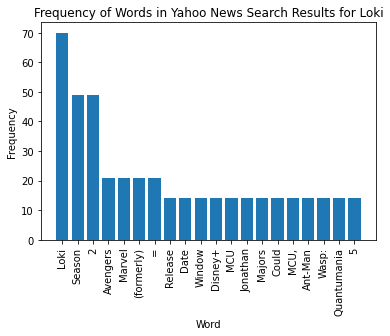

------


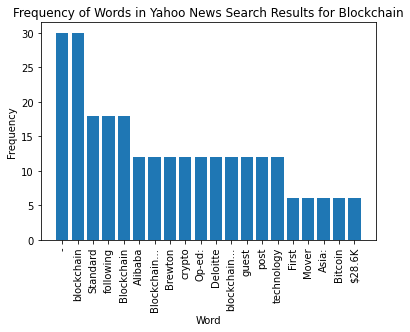

------


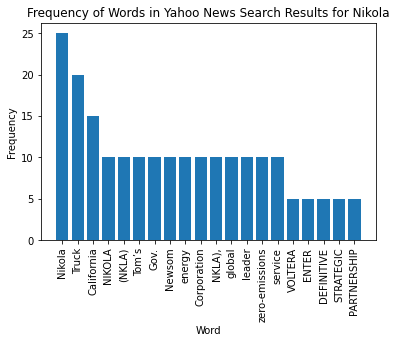

------


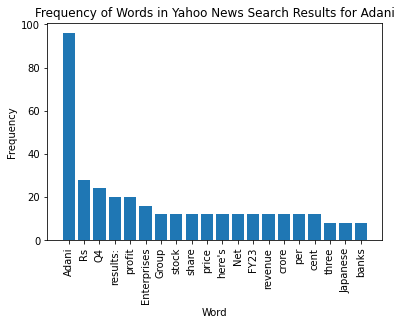

------


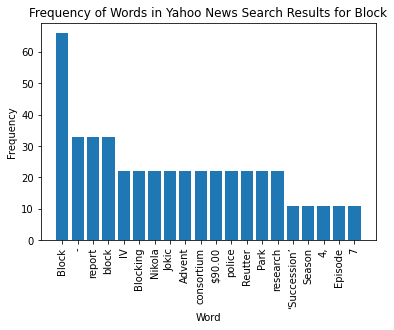

------


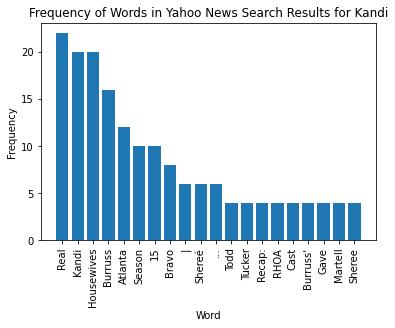

------


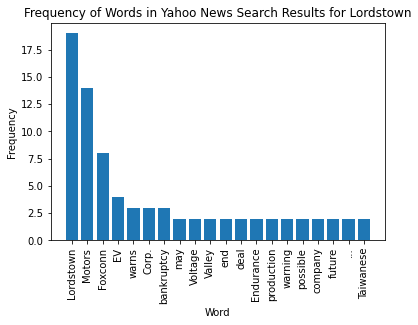

------


In [9]:
for company in companies:
    # Filter the DataFrame for the current company
    df_company = df[df["company"] == company]

    # Join all titles and summaries into a single string
    text = " ".join(df_company["title"].tolist() + df_company["summary"].tolist())

    # Split the text into individual words
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    # Count the frequency of each word
    word_counts = Counter(words)

    # Create a bar chart of the 20 most common words
    most_common_words = word_counts.most_common(20)
    x = [word[0] for word in most_common_words]
    y = [word[1] for word in most_common_words]
    plt.bar(x, y)
    plt.title(f"Frequency of Words in Yahoo News Search Results for {company}")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    # plt.savefig(f"v-Word Frequency-YN-{company}.png", dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join('Visualizations', f"Word Frequency-YN-{company}.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("------")

In [10]:
# Group the data by company and count the number of articles
grouped_data = df.groupby('company').size().reset_index(name='count')

# Print the exact number of articles for each company
for index, row in grouped_data.iterrows():
    print(f"Company: {row['company']}, Number of articles: {row['count']}")


Company: Adani, Number of articles: 40
Company: Block, Number of articles: 110
Company: Blockchain, Number of articles: 60
Company: Ebix, Number of articles: 90
Company: Kandi, Number of articles: 20
Company: Loki, Number of articles: 70
Company: Lordstown, Number of articles: 10
Company: Nikola, Number of articles: 40
Company: Twitter, Number of articles: 100


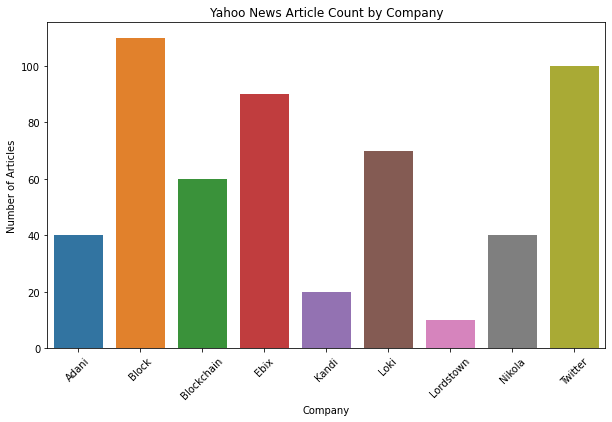

In [11]:
# First, group the data by company and count the number of articles
grouped_data = df.groupby('company').size().reset_index(name='count')

# Data visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='count', data=grouped_data)
plt.xlabel("Company")
plt.ylabel("Number of Articles")
plt.title("Yahoo News Article Count by Company")
plt.xticks(rotation=45)
plt.savefig("v-Article Count Frequency-YN.png", dpi=300, bbox_inches='tight')
plt.show()

### The following cell collects data from Hindenburg Research about our companies
Warning: don't run this block repeatedly, you'll risk getting your IP blocked.

In [12]:
for search_term in companies:
    # Get user input for the URL
    url = f'https://hindenburgresearch.com/{search_term}'
    # Send a GET request to the URL and parse the HTML content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract all headers and their related paragraphs
    headers = {}
    current_header = None
    for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
        if element.name.startswith('h'):
            # If a new header is found, update the current header
            current_header = element.text.strip()
            headers[current_header] = []
        elif current_header is not None:
            # If a paragraph is found, add it to the list of paragraphs for the current header
            headers[current_header].append(element.text.strip())

    # Create a list of dictionaries with the title, summary, source, and company information
    data = []
    for header, paragraphs in headers.items():
        data.append({
            'title': header,
            'summary': ' '.join(paragraphs),
            'source': 'Hindenburg Research',
            'company': search_term  # Add the company information
        })

    # Append the new data to the existing DataFrame
    df = df.append(pd.DataFrame(data), ignore_index=True)

# Print the dataframe
print(df)


C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\2470689038.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\2470689038.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\2470689038.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)
C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\2470689038.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFram

                                                  title  \
0     NBA Twitter reacts to Denver Nuggets' Nikola J...   
1     Twitter Criticized for Allowing Texas Shooting...   
2     You’ll Never Walk Alone performance at Coronat...   
3     Twitter Memed Katy Perry Being Super Lost At T...   
4     New Twitter rules expose election offices to s...   
...                                                 ...   
1123  Conclusion: Investors, Workers, And The Local ...   
1124  Disclosure: We are short shares of Lordstown M...   
1125              Appendix A: Background on Steve Burns   
1126                                   Legal Disclaimer   
1127  262 thoughts on “The Lordstown Motors Mirage: ...   

                                                summary               source  \
0     NBA Twitter had thoughts on the incident betwe...           Yahoo News   
1     When graphic images began circulating on Twitt...           Yahoo News   
2     The song has a close link to Liverpool footba

C:\Users\udayk\AppData\Local\Temp\ipykernel_11844\2470689038.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data), ignore_index=True)


In [13]:
df['company'].unique()

array(['Twitter', 'Ebix', 'Block', 'Loki', 'Blockchain', 'Nikola',
       'Adani', 'Kandi', 'Lordstown'], dtype=object)

In [14]:
# Group the data by company and count the number of articles
grouped_data = df.groupby('company').size().reset_index(name='count')

# Print the exact number of articles for each company
for index, row in grouped_data.iterrows():
    print(f"Company: {row['company']}, Number of articles: {row['count']}")

Company: Adani, Number of articles: 181
Company: Block, Number of articles: 292
Company: Blockchain, Number of articles: 67
Company: Ebix, Number of articles: 150
Company: Kandi, Number of articles: 81
Company: Loki, Number of articles: 77
Company: Lordstown, Number of articles: 47
Company: Nikola, Number of articles: 120
Company: Twitter, Number of articles: 113


In [15]:
df['source'].unique()

array(['Yahoo News', 'Hindenburg Research'], dtype=object)

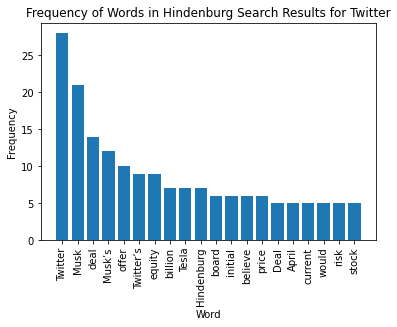

------


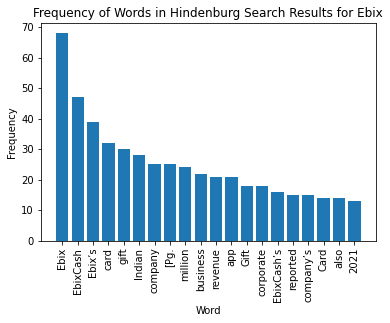

------


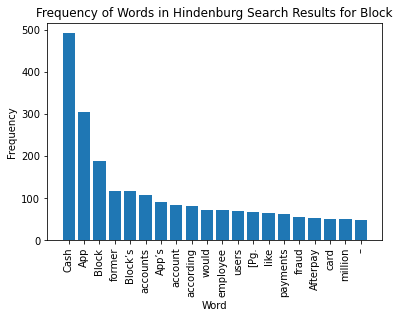

------


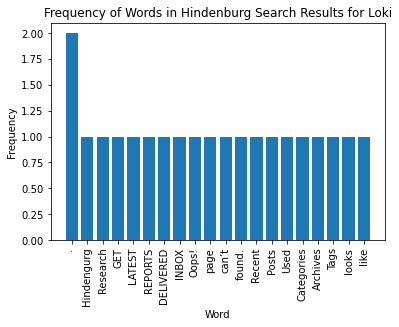

------


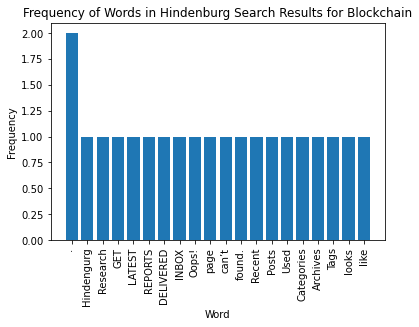

------


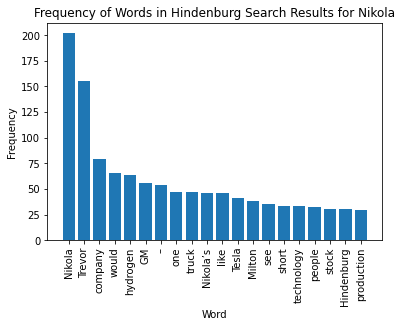

------


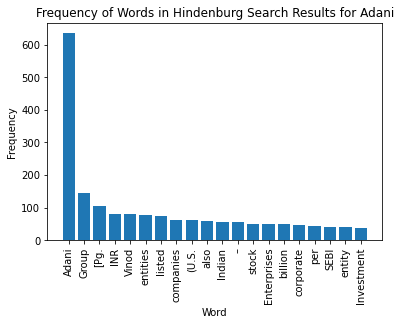

------


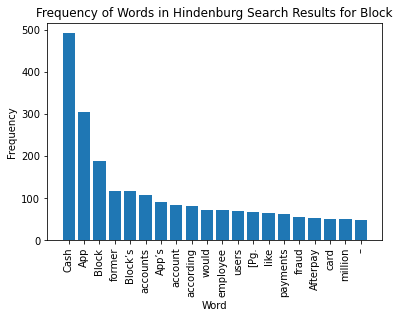

------


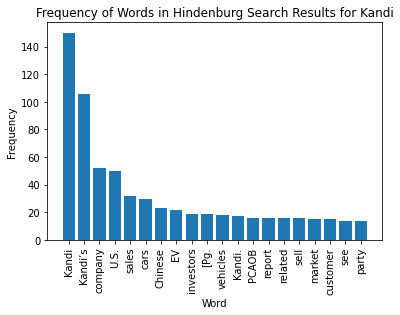

------


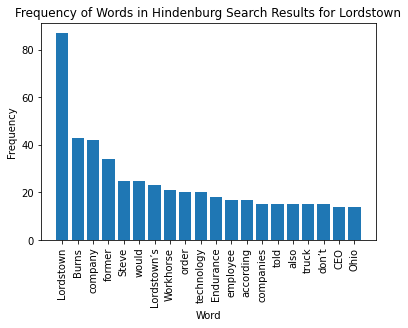

------


In [20]:
for company in companies:
    # Filter the DataFrame for the current company
    # df_company = df[df["company"] == company and df["source"] == 'Hindenburg Research']
    df_company = df[(df["company"] == company) & (df["source"] == 'Hindenburg Research')]

    # Join all titles and summaries into a single string
    text = " ".join(df_company["title"].tolist() + df_company["summary"].tolist())

    # Split the text into individual words
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    # Count the frequency of each word
    word_counts = Counter(words)

    # Create a bar chart of the 20 most common words
    most_common_words = word_counts.most_common(20)
    x = [word[0] for word in most_common_words]
    y = [word[1] for word in most_common_words]
    plt.bar(x, y)
    plt.title(f"Frequency of Words in Hindenburg Search Results for {company}")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    # plt.savefig(f"v-Word Frequency-YN-{company}.png", dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join('Visualizations', f"Word Frequency-HR-{company}.png"), dpi=300, bbox_inches='tight')
    plt.show()
    print("------")

In [24]:
df

,title,summary,source,company
0,nba twitter reacts denver nuggets' nikola joki...,nba twitter thoughts incident nikola jokic pho...,Yahoo News,Twitter
1,twitter criticized allowing texas shooting ima...,graphic images began circulating twitter showi...,Yahoo News,Twitter
2,you’ll never walk alone performance coronation...,"song close link liverpool football club, whose...",Yahoo News,Twitter
3,twitter memed katy perry super lost coronation...,video katy perry struggling find seat #coronat...,Yahoo News,Twitter
4,new twitter rules expose election offices spoo...,election commission applied weeks ago gray che...,Yahoo News,Twitter
...,...,...,...,...
1123,"conclusion: investors, workers, local communit...",one key thread experienced research hope. even...,Hindenburg Research,Lordstown
1124,disclosure: short shares lordstown motors corp...,,Hindenburg Research,Lordstown
1125,appendix a: background steve burns,"typically, upstart auto companies rely heavily...",Hindenburg Research,Lordstown
1126,legal disclaimer,use hindenburg research’s research risk. event...,Hindenburg Research,Lordstown


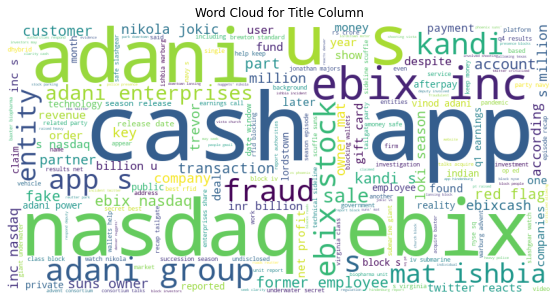

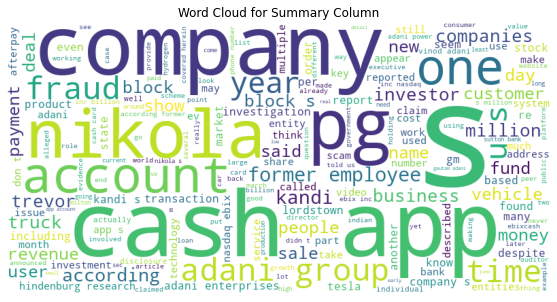

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(df['title']) + ' ' + ' '.join(df['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

## Results

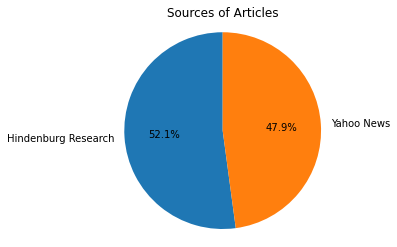

In [32]:
source_counts = df['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_facecolor('white')
plt.title('Sources of Articles')
plt.show()


## NLP Vader Lexicon

In [35]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [39]:
# Group the data by company and count the number of articles
grouped_data = df.groupby('company')

# Loop over the groups and create a new data frame for each group
for group_name, group_data in grouped_data:
    group_df = pd.DataFrame(group_data)
    print('Group:', group_name)
    group_df
    group_df['title_sentiment'] = group_df['title'].apply(get_sentiment_scores)
    group_df['summary_sentiment'] = group_df['summary'].apply(get_sentiment_scores)
    title_sentiment_avg = group_df['title_sentiment'].apply(lambda x: x['compound']).mean()
    summary_sentiment_avg = group_df['summary_sentiment'].apply(lambda x: x['compound']).mean()

    print("Title sentiment average:", title_sentiment_avg)
    print("Summary sentiment average:", summary_sentiment_avg)

Group: Adani
Title sentiment average: 0.03885966850828723
Summary sentiment average: 0.137321546961326
Group: Block
Title sentiment average: -0.18250787671232865
Summary sentiment average: -0.11688801369863006
Group: Blockchain
Title sentiment average: 0.07623582089552239
Summary sentiment average: 0.1319223880597015
Group: Ebix
Title sentiment average: 0.09495933333333328
Summary sentiment average: 0.25737599999999994
Group: Kandi
Title sentiment average: -0.007106172839506174
Summary sentiment average: 0.14979506172839502
Group: Loki
Title sentiment average: -0.03311818181818181
Summary sentiment average: 0.12353506493506491
Group: Lordstown
Title sentiment average: -0.04899999999999999
Summary sentiment average: 0.3453595744680851
Group: Nikola
Title sentiment average: 0.05930083333333334
Summary sentiment average: 0.2458983333333333
Group: Twitter
Title sentiment average: 0.03417256637168141
Summary sentiment average: 0.017971681415929214


# NLP MultinomialNB

In [40]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [48]:
# define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate sentiment polarity for each row in the dataframe
df['polarity'] = df['summary'].apply(calculate_sentiment)

# define the features and target for the scikit-learn model
X = df['summary']
y = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# train a naive Bayes classifier on the labeled dataset
clf = MultinomialNB()
clf.fit(X, y)

# predict sentiment for a new text
new_text = input("Enter a sentence:")
new_text_features = vectorizer.transform([new_text])
new_text_sentiment = clf.predict(new_text_features)[0]
print(new_text_sentiment)

positive


In [55]:
# define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate sentiment polarity for each row in the dataframe
df['polarity'] = df['summary'].apply(calculate_sentiment)

# Group the DataFrame by the 'company' column and calculate the mean polarity for each company
average_polarity = df.groupby('company')['polarity'].mean()

# Print the average polarity scores for each company
print(average_polarity)


company
Adani        -0.006473
Block         0.035900
Blockchain    0.082749
Ebix          0.129893
Kandi         0.066029
Loki          0.067876
Lordstown     0.039863
Nikola        0.056042
Twitter       0.029327
Name: polarity, dtype: float64


In [56]:
# define a function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate sentiment polarity for each row in the dataframe
df['polarity'] = df['summary'].apply(calculate_sentiment)

# Group the DataFrame by the 'company' and 'source' columns and calculate the mean polarity for each group
average_polarity = df.groupby(['company', 'source'])['polarity'].mean()

# Print the average polarity scores for each company and source
print(average_polarity)


company     source             
Adani       Hindenburg Research    0.014740
            Yahoo News            -0.081250
Block       Hindenburg Research    0.023624
            Yahoo News             0.056212
Blockchain  Hindenburg Research    0.028571
            Yahoo News             0.089069
Ebix        Hindenburg Research    0.014941
            Yahoo News             0.206528
Kandi       Hindenburg Research    0.032412
            Yahoo News             0.168561
Loki        Hindenburg Research    0.028571
            Yahoo News             0.071806
Lordstown   Hindenburg Research    0.041178
            Yahoo News             0.035000
Nikola      Hindenburg Research    0.060625
            Yahoo News             0.046875
Twitter     Hindenburg Research    0.082716
            Yahoo News             0.022386
Name: polarity, dtype: float64
